<a href="https://colab.research.google.com/github/rohan821101/Fake-News-Using-AI/blob/main/FakeNewsFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
fake = pd.read_csv("/content/drive/MyDrive/Capstone/Fake.csv")
true = pd.read_csv("/content/drive/MyDrive/Capstone/True.csv")

In [ ]:
fake['target'] = 0
true['target'] = 1

Joining the both datsets for better analysis





In [ ]:
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [ ]:
data.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [ ]:
data['original'] = data['title']+ ' ' + data['text']
data.head()

,title,text,subject,date,target,original
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,Donald Trump Sends Out Embarrassing New Year’...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,Drunk Bragging Trump Staffer Started Russian ...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,Sheriff David Clarke Becomes An Internet Joke...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,Trump Is So Obsessed He Even Has Obama’s Name...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,Pope Francis Just Called Out Donald Trump Dur...


In [ ]:
data.sample(5)

,title,text,subject,date,target,original
29134,Justice Department will not file immediate sta...,TORONTO (Reuters) - The U.S. Department of Jus...,politicsNews,"February 4, 2017",1,Justice Department will not file immediate sta...
17370,HOW A SINGLE FEDERAL BUREAUCRAT OPENED THE DOO...,Meet Alice Miller who single-handedly scr*wed ...,Government News,"May 6, 2015",0,HOW A SINGLE FEDERAL BUREAUCRAT OPENED THE DOO...
13476,RIDICULOUS! SECRET SERVICE Investigating “Poss...,Are they kidding? This was even a lead story o...,politics,"Jul 20, 2016",0,RIDICULOUS! SECRET SERVICE Investigating “Poss...
27204,"House panel seeks FBI, Department of Justice d...",WASHINGTON (Reuters) - The House Intelligence ...,politicsNews,"May 18, 2017",1,"House panel seeks FBI, Department of Justice d..."
14081,WATCH: LITTLE HOUSE ON PRAIRIE ACTRESS Runs Fo...,America has proven time and time again that li...,politics,"Apr 19, 2016",0,WATCH: LITTLE HOUSE ON PRAIRIE ACTRESS Runs Fo...


In [ ]:
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)
data.shape

(44898, 6)

In [ ]:
import nltk
nltk.download('punkt')
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
nltk.download("stopwords")
stop_words = stopwords.words('english')
stop_words.extend (['from', 'subject', 'reuters', 'Reuters', 'edu','use'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def preprocess(text):
  result= []
  for token in gensim.utils.simple_preprocess(text):
    if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
      result.append(token)

  return result

In [ ]:
data['clean'] = data['original'].apply(preprocess)

In [ ]:
print(data['clean'][7835])

['apple', 'google', 'facebook', 'skip', 'legal', 'challenge', 'travel', 'francisco', 'apple', 'alphabet', 'google', 'facebook', 'technology', 'companies', 'appear', 'backed', 'away', 'legal', 'fight', 'president', 'donald', 'trump', 'controversial', 'travel', 'deciding', 'weight', 'lawsuit', 'seeking', 'block', 'second', 'version', 'executive', 'order', 'legal', 'brief', 'filed', 'federal', 'court', 'hawaii', 'tuesday', 'behalf', 'silicon', 'valley', 'companies', 'listed', 'support', 'companies', 'half', 'signatories', 'similar', 'brief', 'filed', 'appeals', 'court', 'month', 'trump', 'executive', 'order', 'banning', 'travel', 'number', 'countries', 'administration', 'said', 'posed', 'security', 'risk', 'airbnb', 'dropbox', 'kickstarter', 'companies', 'sign', 'brief', 'major', 'tech', 'companies', 'signed', 'earlier', 'effort', 'week', 'included', 'microsoft', 'corp', 'ebay', 'intel', 'corp', 'netflix', 'twitter', 'lawsuit', 'succeed', 'despite', 'losing', 'overt', 'support', 'names', 

In [ ]:
# Obtaining The Total Words Present In The Dataset
list_of_words = []
for i in data.clean:
    for j in i:
        list_of_words.append(j)
# Obtaining The Total Number Of Unique Words
total_words = len(list(set(list_of_words)))
total_words


108703

In [ ]:
data['clean_joined'] = data['clean'].apply(lambda x: " ".join(x))

In [ ]:
data.head()

,title,text,subject,date,target,original,clean,clean_joined
0,TRUMP’S GREAT ANSWER On Terror Attack: “It’s a...,,politics,"Dec 22, 2016",0,TRUMP’S GREAT ANSWER On Terror Attack: “It’s a...,"[trump, great, answer, terror, attack, attack,...",trump great answer terror attack attack humani...
1,Critic of Rwandan president to face criminal t...,KIGALI (Reuters) - A critic of Rwandan Preside...,worldnews,"October 5, 2017",1,Critic of Rwandan president to face criminal t...,"[critic, rwandan, president, face, criminal, t...",critic rwandan president face criminal trial f...
2,Austria's far-right Freedom Party congratulate...,VIENNA (Reuters) - Austrian far-right leader H...,politicsNews,"November 9, 2016",1,Austria's far-right Freedom Party congratulate...,"[austria, right, freedom, party, congratulates...",austria right freedom party congratulates trum...
3,Chinese State Media Calls Trump Out After He ...,Donald Trump has been poking China with a prov...,News,"December 12, 2016",0,Chinese State Media Calls Trump Out After He ...,"[chinese, state, media, calls, trump, gives, c...",chinese state media calls trump gives china po...
4,Canadian police probe mysterious deaths of bil...,TORONTO (Reuters) - Canadian police are invest...,worldnews,"December 16, 2017",1,Canadian police probe mysterious deaths of bil...,"[canadian, police, probe, mysterious, deaths, ...",canadian police probe mysterious deaths billio...


Verticle plot of Fake News and True News

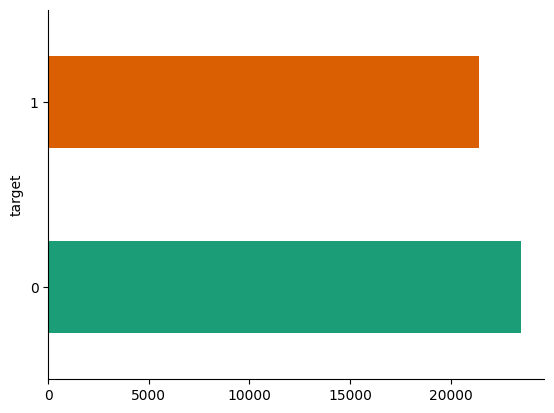

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('target').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Analyzing the genre of news based on SUBJECT column

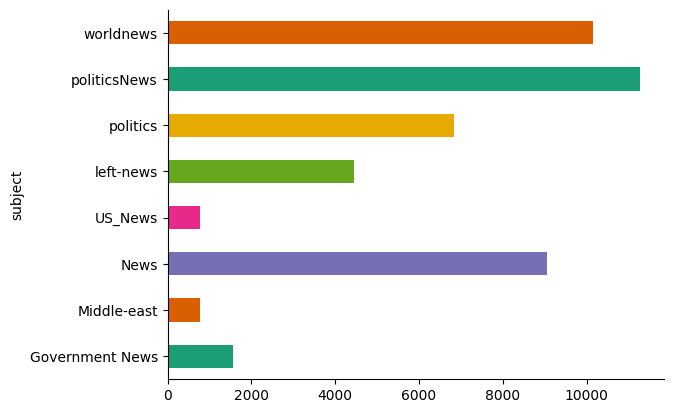

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('subject').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Histogram

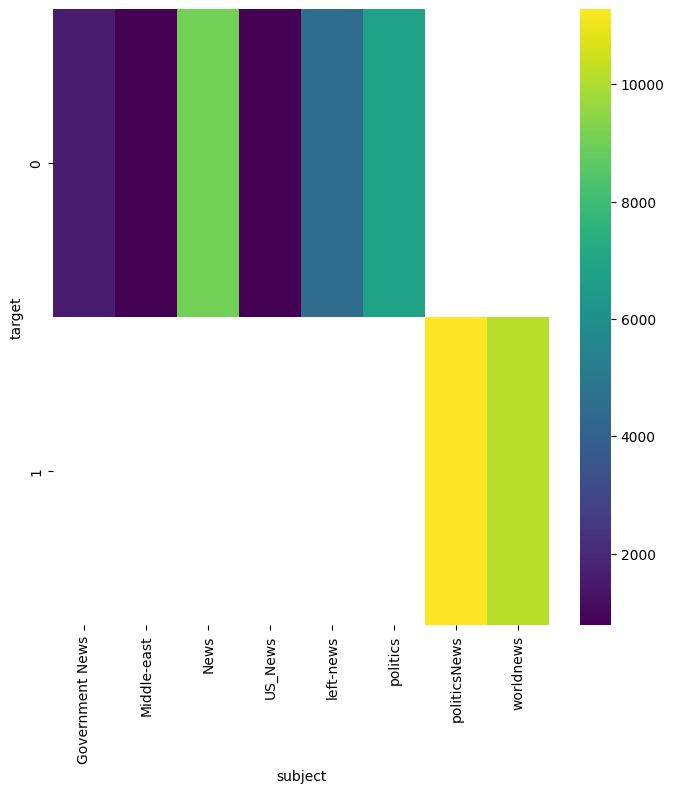

In [ ]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['target'].value_counts()
    for x_label, grp in data.groupby('subject')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('subject')
_ = plt.ylabel('target')

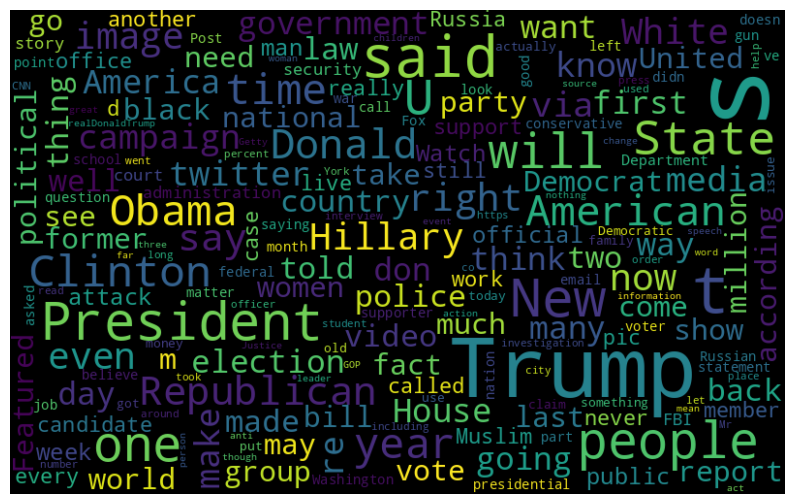

In [ ]:
#Word Cloud of FAKE NEWS for better understanding
from wordcloud import WordCloud

fake_data = data[data["target"] == 0]
all_fake_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_fake_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

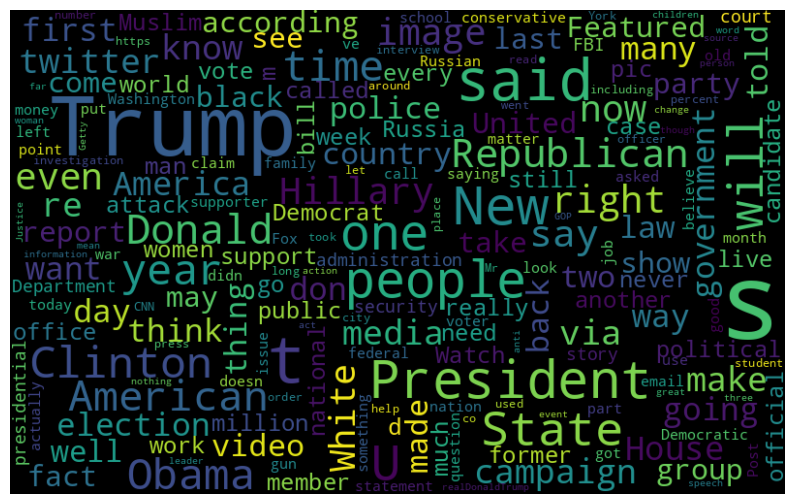

In [ ]:
# Word Cloud for REAL NEWS for better understanding
real_data = data[data["target"] == 1]
all_real_words = ' '.join([text for text in real_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_real_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [ ]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(data['clean_joined'], data.target, test_size=0.2, random_state=42)

In [ ]:
dct = dict()

In [ ]:
#Implementation of Naive Byes
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', NB_classifier)])

model_NB = pipe.fit(X_train, y_train)
prediction = model_NB.predict(X_test)

dct['Naive Bayes'] = round(accuracy_score(y_test, prediction)*100,2)

In [ ]:
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print("precision: {}%".format(round(precision_score(y_test, prediction)*100,2)))

accuracy: 92.51%
precision: 92.87%


Confusion matrix, without normalization


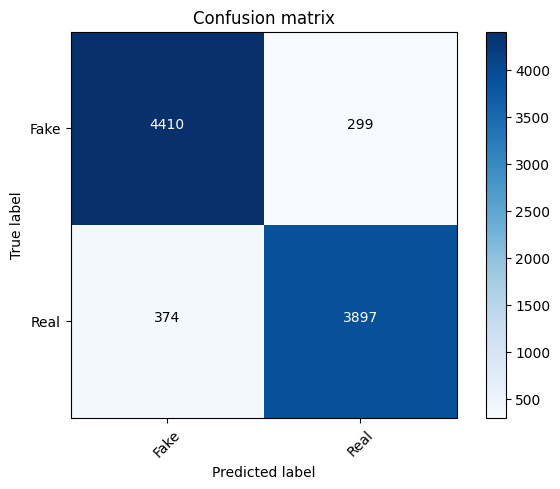

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

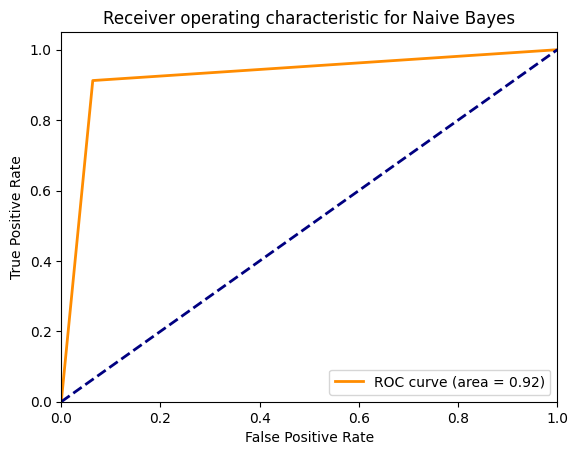

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Generate some fake data
y_true = y_test
y_scores = prediction

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Naive Bayes')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#Logistic Regression

# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model_LR = pipe.fit(X_train, y_train)

# Accuracy
prediction = model_LR.predict(X_test)
dct['Logistic Regression'] = round(accuracy_score(y_test, prediction)*100,2)


In [ ]:
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print("precision: {}%".format(round(precision_score(y_test, prediction)*100,2)))

accuracy: 97.82%
precision: 97.42%


Confusion matrix, without normalization


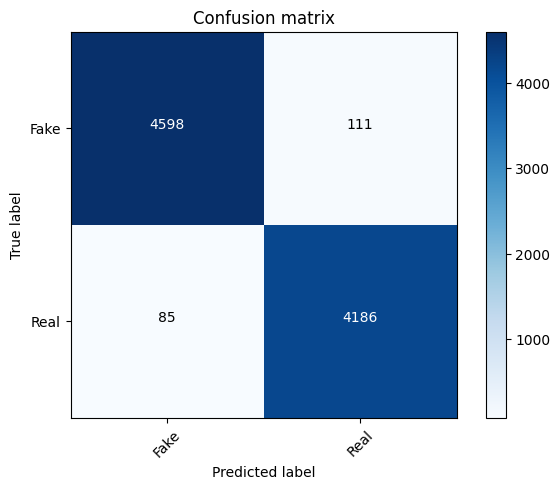

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

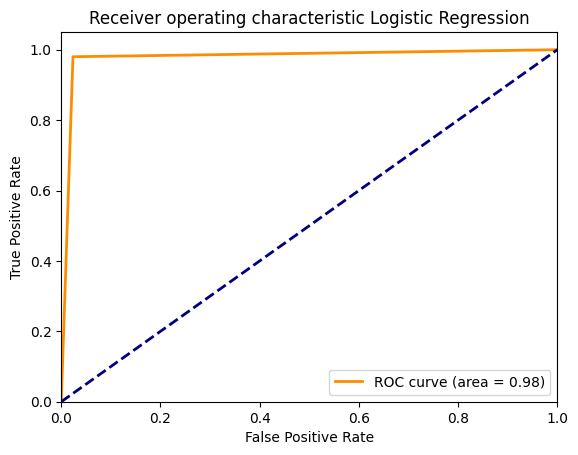

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Generate some fake data
y_true = y_test
y_scores = prediction

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Logistic Regression')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20,
                                           splitter='best',
                                           random_state=42))])
# Fitting the model
model_DT = pipe.fit(X_train, y_train)

# Accuracy
prediction_DT = model_DT.predict(X_test)
dct['Decision Tree'] = round(accuracy_score(y_test, prediction_DT)*100,2)

In [ ]:
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print("precision: {}%".format(round(precision_score(y_test, prediction)*100,2)))

accuracy: 97.82%
precision: 97.42%


Confusion matrix, without normalization


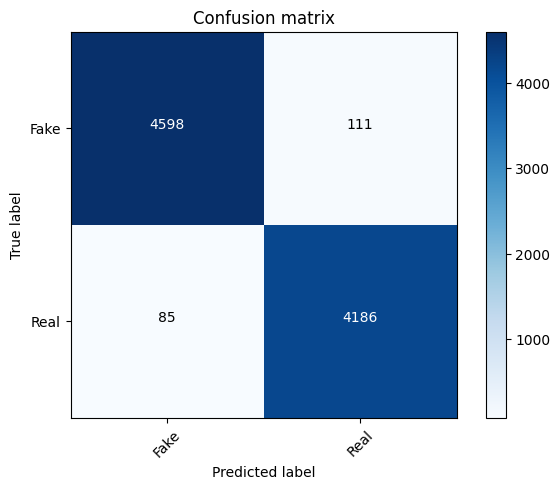

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

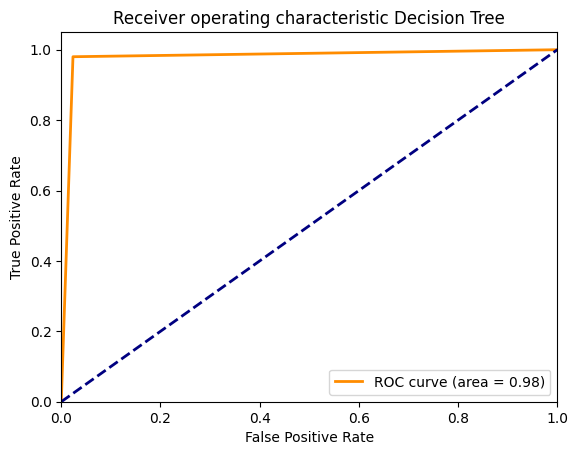

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Generate some fake data
y_true = y_test
y_scores = prediction

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Decision Tree')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model_RF = pipe.fit(X_train, y_train)
prediction = model_RF.predict(X_test)
dct['Random Forest'] = round(accuracy_score(y_test, prediction)*100,2)


In [ ]:
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print("precision: {}%".format(round(precision_score(y_test, prediction)*100,2)))

accuracy: 97.74%
precision: 97.84%


Confusion matrix, without normalization


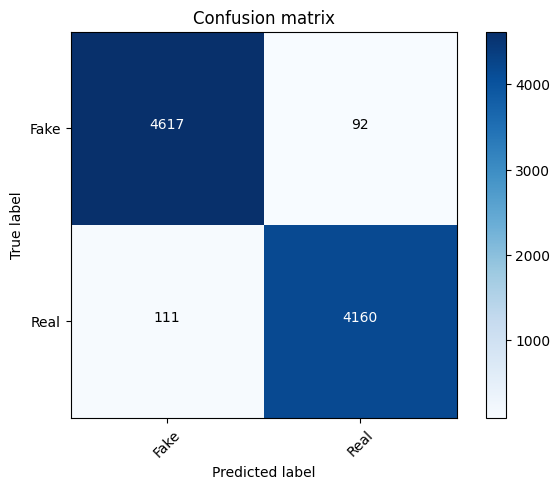

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

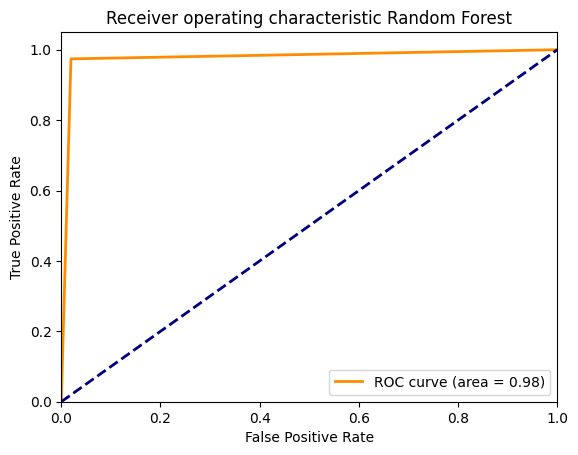

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Generate some fake data
y_true = y_test
y_scores = prediction

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Random Forest')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#Support Vector Machines

from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

pipe = Pipeline([('vect', CountVectorizer()),
                  ('tfidf', TfidfTransformer()),
                  ('model', clf)])

model_SVM = pipe.fit(X_train, y_train)
prediction = model_SVM.predict(X_test)
dct['SVM'] = round(accuracy_score(y_test, prediction)*100,2)


In [ ]:
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print("precision: {}%".format(round(precision_score(y_test, prediction)*100,2)))

accuracy: 98.64%
precision: 98.39%


Confusion matrix, without normalization


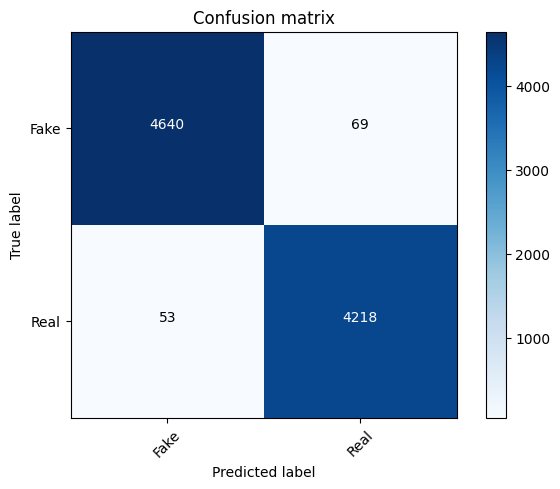

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

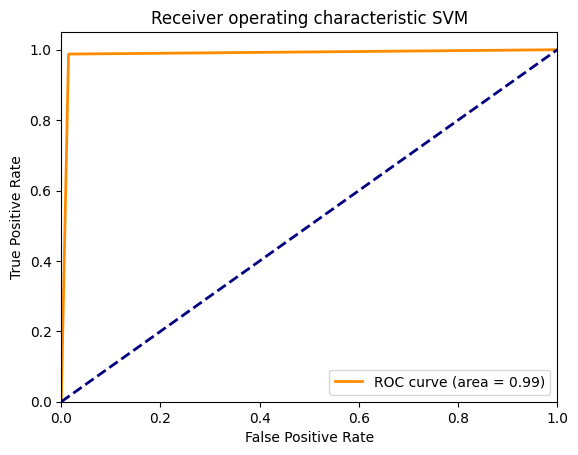

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Generate some fake data
y_true = y_test
y_scores = prediction

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic SVM')
plt.legend(loc="lower right")
plt.show()

([<matplotlib.axis.YTick at 0x7f6389cf10f0>,
 [Text(0, 91, '91'),
  Text(0, 92, '92'),
  Text(0, 93, '93'),
  Text(0, 94, '94'),
  Text(0, 95, '95'),
  Text(0, 96, '96'),
  Text(0, 97, '97'),
  Text(0, 98, '98'),
  Text(0, 99, '99'),
  Text(0, 100, '100')])

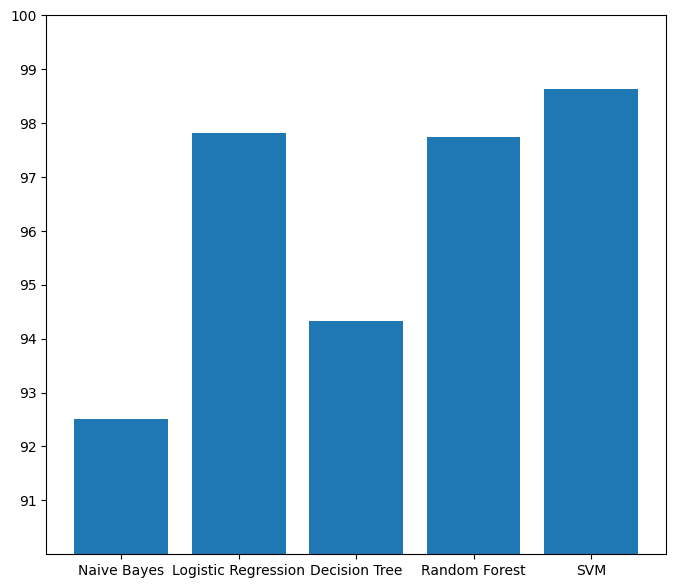

In [ ]:
#Comparing Diffferent Models
import matplotlib.pyplot as plt
plt.figure(figsize=(8,7))
plt.bar(list(dct.keys()),list(dct.values()))
plt.ylim(90,100)
plt.yticks((91, 92, 93, 94, 95, 96, 97, 98, 99, 100))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test , prediction))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4709
           1       0.98      0.99      0.99      4271

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [ ]:
news = [ "Apple refused China request for source code"]

In [ ]:
pred = model_DT.predict(news)
print(pred)

[0]


# **LSTM**

In [ ]:
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Bidirectional
from tensorflow.keras.models import Model

In [ ]:
# Determining The Maximum Number Of Words In Any Document Required To Create Word Embeddings
maxlen = -1
for doc in data.clean_joined:
    tokens = nltk.word_tokenize(doc)
    if(maxlen<len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in any document is =", maxlen)

In [ ]:
# Visualizing The Distribution Of Number Of Words In A Text
import plotly.express as px
fig = px.histogram(x = [len(nltk.word_tokenize(x)) for x in data.clean_joined], nbins = 100)
fig.show()

In [ ]:
# Splitting Data Into Test And Train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.clean_joined, data.target, test_size = 0.2)

# Creating A Tokenizer To Tokenize The Words And Create Sequences Of Tokenized Words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(x_train)
train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)
padded_train = pad_sequences(train_sequences,maxlen = 40, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences,maxlen = 40, truncating = 'post')

In [ ]:
print("The encoding for document\n",data.clean_joined[0],"\n is : ",train_sequences[0])

The encoding for document
 breaking activist appeals court rules trump trump comes swinging tweets awesome reply federal appeals court ruled remain open refugees visa holders seven muslim majority countries rejecting trump administration reinstate travel national security francisco based appeals court thursday spurned government request close doors days public debate president donald trump attacks judicial rush fearful immigrants ruling increases likelihood administration supreme court step case biggest test trump executive power public free flow travel avoiding separation families freedom discrimination judge panel said unanimous page ruling victory tech companies wanting cheap labor panel ruling favor immigrants victory washington minnesota states sued facebook google microsoft corp said court papers measure hinder global businesses read bloomberg business 
 is :  [174, 15, 8, 263, 1076, 3186, 25, 8324, 309, 15982, 15, 8, 91, 1, 2344, 2102, 1089, 148, 2720, 3186, 525, 145, 1378, 4147

In [ ]:
for i,doc in enumerate(padded_train[:2]):
     print("The padded encoding for document",i+1," is : ",doc)

The padded encoding for document 1  is :  [7861   68  325  662  279 7267    9    4   68  536  255   80 2343  709
  391  662  279 3291  389 7267  434   91  389 1237  985  247  133  149
   23 1242  310   41  127  537  255   80  725  662  993 3291]
The padded encoding for document 2  is :  [    1  1951   460   219  2420  3810   150    30    81    25     9     3
    10     1    77   978  1763   963   152   219  3593   859 15194   230
   424 14315  5429   612  1857   171  1075  1979  2253   295 11783   150
    35    30    81  1588]


In [ ]:
# Sequential Model
class Deeplearning:
  def __init__(self, predicted_value=0):
        # declare and initialize an instance variable
        self.predicted_value = predicted_value

  def lstm_train(self,total_words,X,y):
    self.model = Sequential()

    # Embeddidng layer
    self.model.add(Embedding(total_words, output_dim = 128))


    # Bi-Directional RNN and LSTM
    self.model.add(Bidirectional(LSTM(128)))

    # Dense layers
    self.model.add(Dense(128, activation = 'relu'))
    self.model.add(Dense(1,activation= 'sigmoid'))
    self.model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
    y_train = np.asarray(y)

    # Training the model
    self.model.fit(padded_train, y_train, batch_size = 64, validation_split = 0.1, epochs = 5)
    return self.model

In [ ]:
obj = Deeplearning()

In [ ]:
model_LSTM = obj.lstm_train(total_words, padded_train, y_train)

Epoch 1/5
506/506 ━━━━━━━━━━━━━━━━━━━━ 270s 522ms/step - acc: 0.9471 - loss: 0.1155 - val_acc: 0.9989 - val_loss: 0.0082
Epoch 2/5
506/506 ━━━━━━━━━━━━━━━━━━━━ 219s 432ms/step - acc: 0.9995 - loss: 0.0013 - val_acc: 0.9992 - val_loss: 0.0102
Epoch 3/5
506/506 ━━━━━━━━━━━━━━━━━━━━ 259s 425ms/step - acc: 0.9999 - loss: 3.8250e-04 - val_acc: 0.9992 - val_loss: 0.0079
Epoch 4/5
506/506 ━━━━━━━━━━━━━━━━━━━━ 267s 436ms/step - acc: 0.9998 - loss: 0.0010 - val_acc: 0.9989 - val_loss: 0.0139
Epoch 5/5
506/506 ━━━━━━━━━━━━━━━━━━━━ 256s 425ms/step - acc: 1.0000 - loss: 2.1533e-05 - val_acc: 0.9989 - val_loss: 0.0141


In [ ]:
model_LSTM.save('model_LSTM.h5')

In [ ]:
# Making prediction
pred = model_LSTM.predict(padded_test)

281/281 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step


In [ ]:
prediction = []
for i in range(len(pred)):
  if pred[i].item() > 0.95:
    prediction.append(1)
  else:
    prediction.append(0)

In [ ]:
# Getting The Accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(list(y_test), prediction)

print("Model Accuracy : ", round(accuracy*100,2))

Model Accuracy :  99.82


Confusion matrix, without normalization


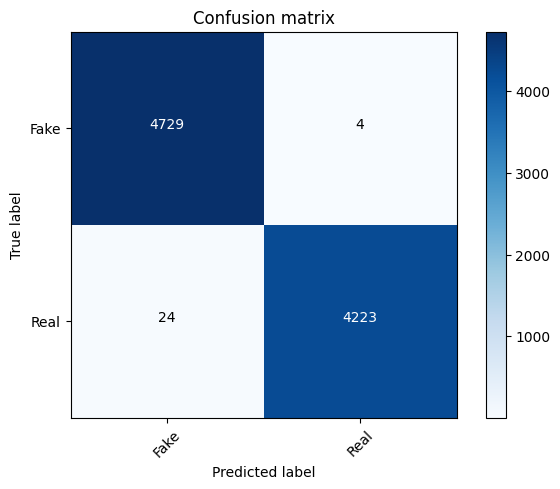

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

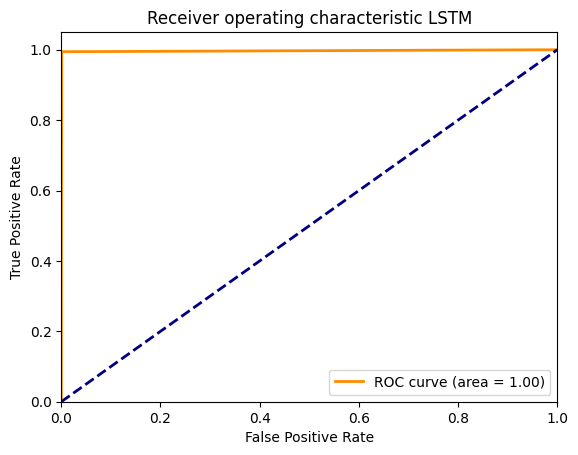

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Generate some fake data
y_true = y_test
y_scores = prediction

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic LSTM')
plt.legend(loc="lower right")
plt.show()

<BarContainer object of 5 artists>

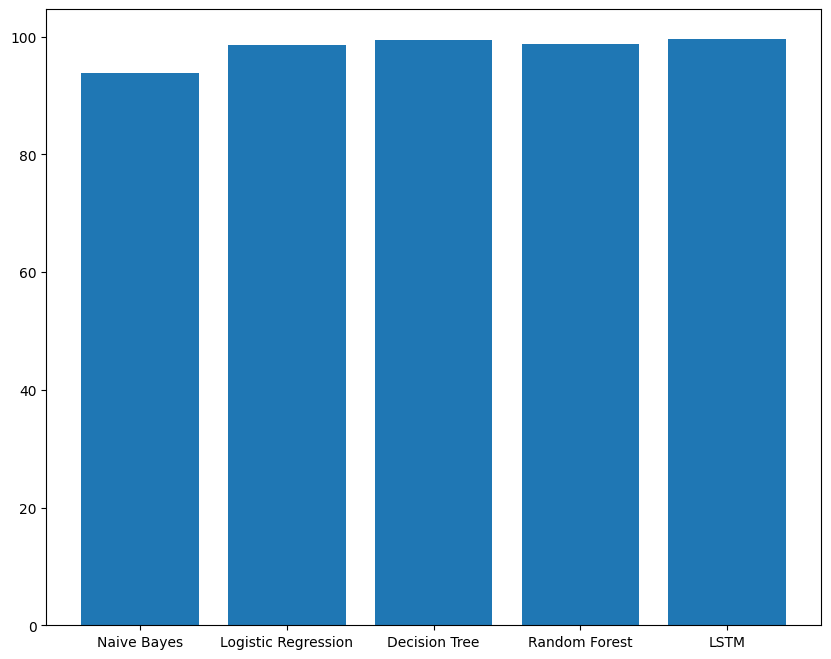

In [ ]:
dct['LSTM'] = round(accuracy_score(y_test, prediction)*100,2)
plt.figure(figsize=(10,8))
plt.bar(list(dct.keys()),list(dct.values()))


# Testing the Model

In [ ]:
data.text[3]

'ISTANBUL (Reuters) - Turkish police have detained 165 people over suspected links to Islamic State in Ankara and have arrest warrants for a total of 245 suspects in the capital and surrounding province, state-run Anadolu news agency said on Thursday. It said 1,500 police officers took part in the operation across Ankara province, raiding 250 addresses. No further details were immediately available. Private broadcaster CNNTurk said police in the northwestern city of Bursa also detained 27 suspects including some Syrian nationals over alleged links to Islamic State. They confiscated documents and materials linked to the organization during raids at the addresses of some suspects, it said. '

In [ ]:
data.target[3]

1

In [ ]:
news = [data.text[3]]

In [ ]:
# Adding Padding
def text_transform(news):
    news_sequences = tokenizer.texts_to_sequences(news)
    news_test = pad_sequences(news_sequences,maxlen = 40, truncating = 'post')
    news = news_test
    return news


In [ ]:
news = text_transform(news)

In [ ]:
pred = model.predict(news)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


In [ ]:
print(pred)

[[0.9984425]]


In [ ]:
prediction = []
for i in range(len(pred)):
  if pred[i].item() > 0.95:
    prediction.append(1)
  else:
    prediction.append(0)

In [ ]:
print(prediction)

[1]


In [ ]:
import pickle

In [ ]:
#pickle.dump(tokenizer, open('tokenizer.pkl', 'wb'))

In [ ]:
pickle.dump(model_LR, open('model_LR.pkl', 'wb'))
pickle.dump(model_SVM, open('model_SVM.pkl', 'wb'))